C:\Users\mgilh\AppData\Local\Temp\ipykernel_27344\2263944134.py:9: RuntimeWarning: overflow encountered in divide
  acceleration = (q * (E + v_cross_B)) / m
C:\Users\mgilh\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\numeric.py:1725: RuntimeWarning: invalid value encountered in multiply
  multiply(a0, b1, out=cp2)
C:\Users\mgilh\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\numeric.py:1726: RuntimeWarning: invalid value encountered in multiply
  multiply(a1, b0, out=tmp)
C:\Users\mgilh\AppData\Local\Temp\ipykernel_27344\2263944134.py:17: RuntimeWarning: invalid value encountered in add
  return state + (k1 + 2*k2 + 2*k3 + k4) * dt / 6
C:\Users\mgilh\AppData\Local\Programs\Python\Python313\Lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:150: RuntimeWarning: invalid value encountered in divide
  txs, tys, tzs = vecw[0] / w, vecw[1] / w, vecw[2] / w


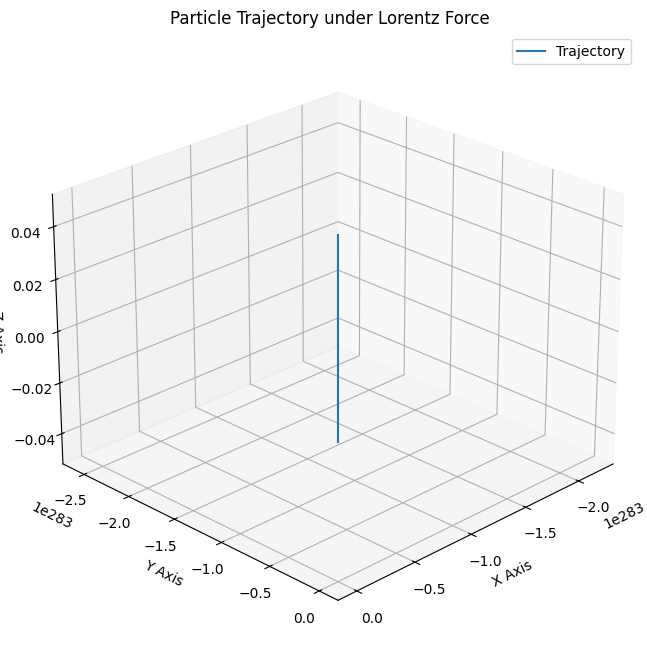

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Runge-Kutta method to integrate the Lorentz force equation
def runge_kutta(t, dt, state, charge, mass, E_field, B_field):
    def lorentz_force(state, q, m, E, B):
        position, velocity = state[:3], state[3:]
        v_cross_B = np.cross(velocity, B)
        acceleration = (q * (E + v_cross_B)) / m
        return np.concatenate((velocity, acceleration))

    k1 = lorentz_force(state, charge, mass, E_field, B_field)
    k2 = lorentz_force(state + k1 * dt / 2, charge, mass, E_field, B_field)
    k3 = lorentz_force(state + k2 * dt / 2, charge, mass, E_field, B_field)
    k4 = lorentz_force(state + k3 * dt, charge, mass, E_field, B_field)
    
    return state + (k1 + 2*k2 + 2*k3 + k4) * dt / 6

# Parameters (ensure they are appropriate to your simulation context)
Electric_Field_strength = np.array([1e5, 0, 0])  # Example: Electric field (V/m)
Magnetic_Field_strength = np.array([0, 0, 1.0])  # Example: Magnetic field (T)
Initial_velocity = np.array([0, 1e6, 0])         # Initial velocity (m/s)
charge = 1.6e-19                                 # Charge (Coulombs)
mass = 9.11e-31                                  # Mass (kg)

# Time settings
t_max = 1e-6
dt = 1e-9
num_steps = int(t_max / dt)

# Initial state [x, y, z, vx, vy, vz]
initial_state = np.concatenate((np.zeros(3), Initial_velocity))

# Arrays to store positions
positions = np.zeros((num_steps, 3))

# Time integration using the Runge-Kutta method
state = initial_state
for i in range(num_steps):
    state = runge_kutta(i * dt, dt, state, charge, mass, Electric_Field_strength, Magnetic_Field_strength)
    positions[i] = state[:3]

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot(positions[:, 0], positions[:, 1], positions[:, 2], label='Trajectory')

# Set labels and title
ax.set_title('Particle Trajectory under Lorentz Force')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.view_init(elev=25, azim=45)  # Adjust viewing angle
ax.legend()

plt.show()